In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset import #

In [3]:
data = pd.read_csv('c:\\Users\\DF6610\\Documents\\ProjectAppauto\\welddb\\welddb.data', delim_whitespace=True, na_values='N')

C:\Users\DF6610\AppData\Local\Temp\ipykernel_3640\2944918486.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('c:\\Users\\DF6610\\Documents\\ProjectAppauto\\welddb\\welddb.data', delim_whitespace=True, na_values='N')


In [4]:
columns = [
    "Carbon concentration / (weight%)",
    "Silicon concentration / (weight%)",
    "Manganese concentration / (weight%)",
    "Sulphur concentration / (weight%)",
    "Phosphorus concentration / (weight%)",
    "Nickel concentration / (weight%)",
    "Chromium concentration / (weight%)",
    "Molybdenum concentration / (weight%)",
    "Vanadium concentration / (weight%)",
    "Copper concentration / (weight%)",
    "Cobalt concentration / (weight%)",
    "Tungsten concentration / (weight%)",
    "Oxygen concentration / parts per million by weight",
    "Titanium concentration / parts per million by weight",
    "Nitrogen concentration / parts per million by weight",
    "Aluminium concentration / parts per million by weight",
    "Boron concentration / parts per million by weight",
    "Niobium concentration / parts per million by weight",
    "Tin concentration / parts per million by weight",
    "Arsenic concentration / parts per million by weight",
    "Antimony concentration / parts per million by weight",
    "Current / A",
    "Voltage / V",
    "AC or DC",
    "Electrode positive or negative",
    "Heat input / kJ/mm",
    "Interpass temperature / deg C",
    "Type of weld",
    "Post weld heat treatment temperature / deg C",
    "Post weld heat treatment time / hours",
    "Yield strength / MPa",
    "Ultimate tensile strength / MPa",
    "Elongation / %",
    "Reduction of Area / %",
    "Charpy temperature / deg C",
    "Charpy impact toughness / J",
    "Hardness / kg/mm2",
    "50 % FATT",
    "Primary ferrite in microstructure / %",
    "Ferrite with second phase / %",
    "Acicular ferrite / %",
    "Martensite / %",
    "Ferrite with carbide aggregate / %",
    "Weld ID"
]


In [5]:
data.columns=columns
data.head()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
2,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-44.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Bht


In [6]:
#data.to_excel('data.xlsx')
# visualiser les données sur excel

# 2. Data Cleaning #

In [7]:
print("le nombre de lignes dans le dataset :" +str(data.shape[0]))
print("le nombre de colonnes dans le dataset :" +str(data.shape[1]))


le nombre de lignes dans le dataset :1651
le nombre de colonnes dans le dataset :44


- Hardness / kg/mm² : Une mesure de la dureté du matériau soudé, qui est souvent liée à la qualité de la soudure.
- Yield strength / MPa ou Ultimate tensile strength / MPa : Ces deux mesures de résistance pourraient également servir de variable cible, car elles reflètent la capacité du matériau à résister à la déformation ou à la rupture.
- Elongation / % ou Reduction of Area / % : Ces mesures sont souvent utilisées pour évaluer la ductilité et la ténacité d'un matériau, ce qui peut être pertinent pour la qualité des soudures.

2.1 Data Cleaning : 

    -  Colonne "Sulphur concentration / (weight%)" remplacer les points par des ,
    -  Colonne "Sulphur concentration / (weight%)" remplacer les <0,002 par 0,002
    -  Colonne "Molybedunum concentration / (weight%)" remplacer les points par des ,
    -  Colonne "Molybedunum concentration / (weight%)" remplacer les <0,01 par 0,01
    - idem Vanadium, copper, cobalt, thungsten, Titanium concentration / parts per million by weight, aluminium, Boron, Niobium, Tin, Arsenic, Antimony
    -  pour Nitrogen  : "67tot33res" pourrait signifier une concentration totale de 67 ppm, dont 33 ppm correspondent à une partie spécifique (comme un résidu ou un sous-composant) => On ne va considérer que 67ppm





2.2 Data Cleaning :

- Transformer toutes les concentrations ppm en % en utilisant la formule excel : 
    Concentration en % =  Concentration en ppm / 10 000
- Interpass temperature / deg C : transformer les valeurs 150-200 par 175 (la moyenne)
- pour la hardnesss /kg/mm2 : 143 HV30 correspond directement à 143 kgf/mm². Il n'y a pas de conversion supplémentaire à effectuer, car la dureté Vickers est déjà exprimée dans cette unité. on élimine donc les HV30 de cette colonne- Primary ferrite in microstructure / % on remplace les <1 par 1






In [8]:
# Nouvel import des données
df = pd.read_excel('c:\\Users\\DF6610\\Documents\\ProjectAppauto\\data.xlsx')
df.head()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
2,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32.0,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-44.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Bht


In [9]:
# On définit Weld Id comme index de notre dataframe
df.set_index(['Weld ID'])

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Reduction of Area / %,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %
Weld ID,,,,,,,,,,,,,,,,,,,,,
Evans-Ni/CMn-1990/1991-0Aawch,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,NaN,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Evans-Ni/CMn-1990/1991-0Aht,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,80.6,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Evans-Ni/CMn-1990/1991-0Baw,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Evans-Ni/CMn-1990/1991-0Bawch,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,NaN,-48.0,100.0,NaN,NaN,32.0,28.0,40.0,0.0,0.0
Evans-Ni/CMn-1990/1991-0Bht,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,80.6,-44.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Birmingham-MAX35,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birmingham-MAX36,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birmingham-MAX37,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.3 Data Cleaning : missing values

In [10]:
df.replace("N", np.nan, inplace=True)


C:\Users\DF6610\AppData\Local\Temp\ipykernel_3640\3282639841.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("N", np.nan, inplace=True)


In [11]:
df.isnull().sum()

Carbon concentration / (weight%)                   0
Silicon concentration / (weight%)                  0
Manganese concentration / (weight%)                0
Sulphur concentration / (weight%)                  4
Phosphorus concentration / (weight%)              10
Nickel concentration / (weight%)                 955
Chromium concentration / (weight%)               867
Molybdenum concentration / (weight%)             858
Vanadium concentration / (weight%)               723
Copper concentration / (weight%)                1073
Cobalt concentration / (weight%)                1522
Tungsten concentration / (weight%)              1576
Oxygen concentration / weight%                   395
Titanium concentration /  weight%                716
Nitrogen concentration / weight%                 409
Aluminium concentration / weight%                746
Boron concentration / weight%                   1147
Niobium concentration / weight%                  899
Tin concentration / weight%                   

On remarque qu'il y a énormément de valeurs manquantes : 

In [12]:
# Les lignes où les concentrations en sulfure sont manquantes sont très similaires : il est donc cohérent de les remplacer par la même valeur
df[df['Sulphur concentration / (weight%)'].isnull()]

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
1302,0.11,0.18,0.70,NaN,NaN,0.13,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hl
1303,0.10,0.17,0.67,NaN,NaN,0.14,2.31,0.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hh
1304,0.11,0.17,0.65,NaN,NaN,0.02,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-ll
1305,0.10,0.16,0.61,NaN,NaN,0.02,2.27,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-lh


In [13]:
# On fait une étude explorative de la colonne Sulphur concentration / (weight%)
df['Sulphur concentration / (weight%)'].describe()

count    1647.00000
mean        0.00953
std         0.01123
min         0.00100
25%         0.00600
50%         0.00700
75%         0.01000
max         0.14000
Name: Sulphur concentration / (weight%), dtype: float64

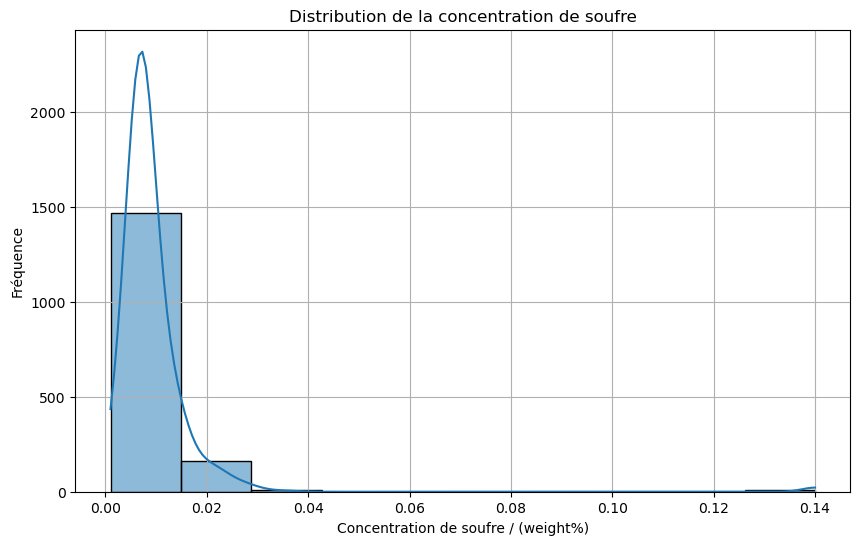

In [14]:
# Tracer le graphique de distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sulphur concentration / (weight%)'], bins=10, kde=True)
plt.title('Distribution de la concentration de soufre')
plt.xlabel('Concentration de soufre / (weight%)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [15]:
# On remplace ces valeurs manquantes par la moyenne des valeurs de la concentration de sulfure la colonne n'ayant pas énormément d'outliers

df['Sulphur concentration / (weight%)'].fillna(0.00953, inplace=True)

C:\Users\DF6610\AppData\Local\Temp\ipykernel_3640\736951763.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulphur concentration / (weight%)'].fillna(0.00953, inplace=True)


In [16]:
# Idem pour le phosphore
df[df['Phosphorus concentration / (weight%)'].isnull()]

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / deg C,Charpy impact toughness / J,Hardness / kg/mm2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
1149,0.11,0.38,1.50,0.02900,NaN,NaN,NaN,0.00,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-26aw
1150,0.11,0.37,1.52,0.03000,NaN,NaN,NaN,0.00,0.050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-27aw
1151,0.11,0.38,1.55,0.02900,NaN,NaN,NaN,0.00,0.090,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-28aw
1152,0.14,0.38,1.65,0.02800,NaN,NaN,NaN,0.50,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-29aw
1153,0.10,0.38,1.58,0.02800,NaN,NaN,NaN,0.50,0.060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-30aw
1154,0.10,0.39,1.68,0.02700,NaN,NaN,NaN,0.50,0.080,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gar&K-1975-12mmE-31aw
1302,0.11,0.18,0.70,0.00953,NaN,0.13,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hl
1303,0.10,0.17,0.67,0.00953,NaN,0.14,2.31,0.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-hh
1304,0.11,0.17,0.65,0.00953,NaN,0.02,2.28,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-ll
1305,0.10,0.16,0.61,0.00953,NaN,0.02,2.27,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natsume-1990-lh


In [17]:
# On fait une étude explorative de la colonne Phosphorus concentration / (weight%)
df['Phosphorus concentration / (weight%)'].describe()

count    1641.000000
mean        0.012953
std         0.019633
min         0.002000
25%         0.007000
50%         0.010000
75%         0.014000
max         0.250000
Name: Phosphorus concentration / (weight%), dtype: float64

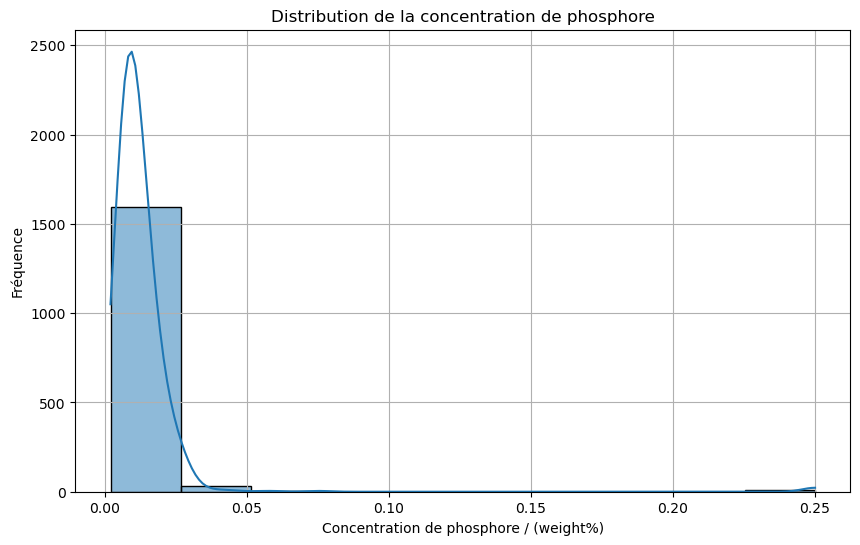

In [18]:
# Tracer le graphique de distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Phosphorus concentration / (weight%)'], bins=10, kde=True)
plt.title('Distribution de la concentration de phosphore')
plt.xlabel('Concentration de phosphore / (weight%)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [19]:
df['Phosphorus concentration / (weight%)'].fillna(0.012953, inplace=True)

C:\Users\DF6610\AppData\Local\Temp\ipykernel_3640\3567353387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phosphorus concentration / (weight%)'].fillna(0.012953, inplace=True)


In [20]:
df['Phosphorus concentration / (weight%)'].isnull().any()

False

In [21]:
df['Nickel concentration / (weight%)'].fillna(df['Nickel concentration / (weight%)'].mean(), inplace=True)
df['Chromium concentration / (weight%)'].fillna(df['Chromium concentration / (weight%)'].mean(), inplace=True)
df['Molybdenum concentration / (weight%)'].fillna(df['Molybdenum concentration / (weight%)'].mean(), inplace=True)
df['Vanadium concentration / (weight%)'].fillna(df['Vanadium concentration / (weight%)'].mean(), inplace=True)
df['Copper concentration / (weight%)'].fillna(df['Copper concentration / (weight%)'].mean(), inplace=True)
df['Cobalt concentration / (weight%)'].fillna(df['Cobalt concentration / (weight%)'].mean(), inplace=True)
df['Tungsten concentration / (weight%)'].fillna(df['Tungsten concentration / (weight%)'].mean(), inplace=True)
df['Oxygen concentration / weight%'].fillna(df['Oxygen concentration / weight%'].mean(), inplace=True)
df['Titanium concentration /  weight%'].fillna(df['Titanium concentration /  weight%'].mean(), inplace=True)
df['Nitrogen concentration / weight%'].fillna(df['Nitrogen concentration / weight%'].mean(), inplace=True)
df['Aluminium concentration / weight%'].fillna(df['Aluminium concentration / weight%'].mean(), inplace=True)
df['Boron concentration / weight%'].fillna(df['Boron concentration / weight%'].mean(), inplace=True)
df['Niobium concentration / weight%'].fillna(df['Niobium concentration / weight%'].mean(), inplace=True)
df['Tin concentration / weight%'].fillna(df['Tin concentration / weight%'].mean(), inplace=True)
df['Arsenic concentration / weight%'].fillna(df['Arsenic concentration / weight%'].mean(), inplace=True)
df['Antimony concentration /  weight%'].fillna(df['Antimony concentration /  weight%'].mean(), inplace=True)

C:\Users\DF6610\AppData\Local\Temp\ipykernel_3640\2246962839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nickel concentration / (weight%)'].fillna(df['Nickel concentration / (weight%)'].mean(), inplace=True)
C:\Users\DF6610\AppData\Local\Temp\ipykernel_3640\2246962839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [22]:
df.isnull().sum()

Carbon concentration / (weight%)                   0
Silicon concentration / (weight%)                  0
Manganese concentration / (weight%)                0
Sulphur concentration / (weight%)                  0
Phosphorus concentration / (weight%)               0
Nickel concentration / (weight%)                   0
Chromium concentration / (weight%)                 0
Molybdenum concentration / (weight%)               0
Vanadium concentration / (weight%)                 0
Copper concentration / (weight%)                   0
Cobalt concentration / (weight%)                   0
Tungsten concentration / (weight%)                 0
Oxygen concentration / weight%                     0
Titanium concentration /  weight%                  0
Nitrogen concentration / weight%                   0
Aluminium concentration / weight%                  0
Boron concentration / weight%                      0
Niobium concentration / weight%                    0
Tin concentration / weight%                   

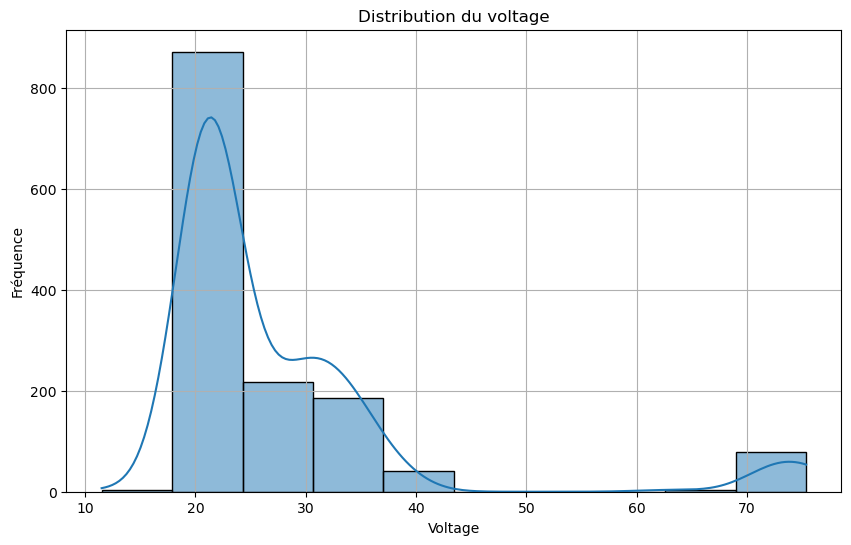

In [25]:
# On va s'intéresser aux valeurs manquantes de courant et de voltage
# Tracer le graphique de distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Voltage / V'], bins=10, kde=True)
plt.title('Distribution du voltage')
plt.xlabel('Voltage')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


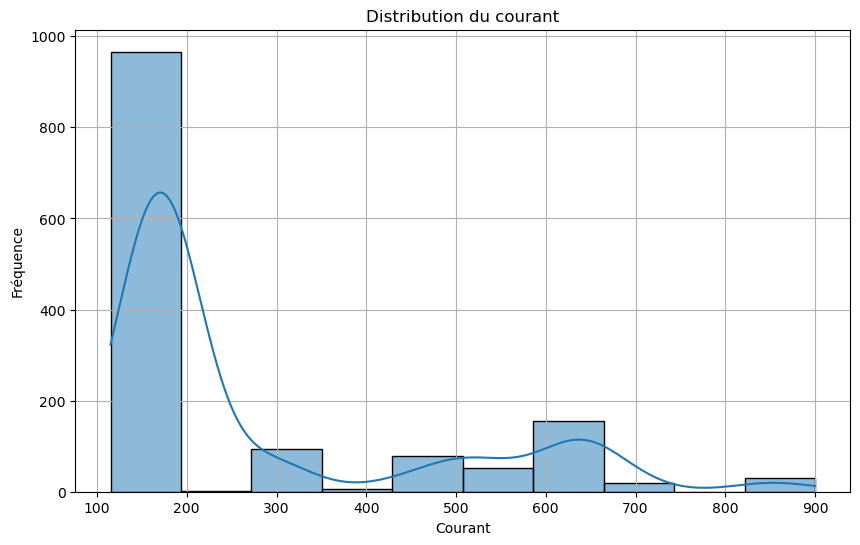

In [27]:
# On va s'intéresser aux valeurs manquantes de courant et de voltage
# Tracer le graphique de distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Current / A'], bins=10, kde=True)
plt.title('Distribution du courant')
plt.xlabel('Courant')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# Distribution pas très symétriques, remplacer par la moyenne serait une mauvaise idée


In [48]:
import pandas as pd

# Exemple de DataFrame avec une colonne d'identifiants
data_exple = {
    'ID': ['abcd123', 'abc124', 'abcd125', 'def456', 'def457', 'ghi789', 'ghi7abc']
}

df_exple = pd.DataFrame(data_exple)

# Fonction pour trouver le plus long préfixe commun
def find_longest_common_prefix(ids):
    if not ids:
        return ""
    
    prefix = ids[0]  # Commencer avec le premier identifiant
    for id in ids[1:]:
        while not id.startswith(prefix) and prefix:  # Réduire le préfixe jusqu'à ce qu'il corresponde
            prefix = prefix[:-1]
    return prefix

# Appliquer la fonction à chaque identifiant pour déterminer le préfixe commun
def get_common_prefix(current_id, ids):
    # Chercher le préfixe commun uniquement parmi ceux qui partagent un préfixe similaire
    return find_longest_common_prefix([id for id in ids if id.startswith(current_id[:3])])

# Appliquer la fonction pour chaque ID
df_exple['Common_Prefix'] = df_exple['ID'].apply(lambda x: get_common_prefix(x, df_exple['ID'].tolist()))

print(df_exple)


        ID Common_Prefix
0  abcd123           abc
1   abc124           abc
2  abcd125           abc
3   def456         def45
4   def457         def45
5   ghi789          ghi7
6  ghi7abc          ghi7


In [52]:
df['Common_Prefix'] = df['Weld ID'].apply(lambda x: get_common_prefix(x, df['Weld ID'].tolist()))
df['Common_Prefix'].value_counts()

Common_Prefix
Evans                      855
SvenGret-1990-              96
Pat-1981-                   79
Mart-                       70
Gar&K-1975-                 56
PantK-1990-                 54
Cunh-1982-                  38
EvHtIp1979-                 32
Wolst-1974-                 32
Icici&-1992-                30
Chandel&-1985W              23
KocakP                      21
Ditt-                       20
RaiterGonzal-Mo-1989-       18
Blond&-1984-                18
PakSven-1990-               17
Hunt&-Di-1994-              16
JorgeEtAl-1993-             16
Stil-TiB-1978-              16
Wats-1981-                  12
Kluket-CuMnB-1994-          12
EPRI-TR-101394s-E9          12
Es-Souni&-Cu/CMn-1990-      12
Ga&K-1975II-                10
Birmingham-MAX3              9
SurianEtAl-C-1991-0.         8
Alekseev&-CMnNi-1991-CH      7
Sw&Rog-1973                  4
Natsume-1990-                4
RC81033                      4
p25-RR82011                  2
p36-RR82011              

In [ ]:
# df_pivot= pd.pivot_table(df,values=['colonne1',...],aggfunc={'colonne1':"mean",...})